In [1]:
#Importing Libraries
import pandas as pd


In [2]:
#Reading Data Set
df = pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
#Separation des données d'entrainement et données de test
#On les divise en 80% pour les données d'entrainement et 20 % pour les données de test
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


x_train shape: (160, 5)
x_test shape: (40, 5)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [4]:
from imblearn.over_sampling import SMOTE


x_train = pd.get_dummies(pd.DataFrame(x_train))
x_test = pd.get_dummies(pd.DataFrame(x_test))
x_train, y_train = SMOTE().fit_resample(x_train, y_train)



In [5]:
#L'implementation des modèles 

# Pour stocker les resultats des modeles 
result_dict_train = {}
result_dict_test = {}

In [6]:
#Classification KNN
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))


#Prediction
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Le rapport de la classification
print(classification_report(y_test, y_pred))
#La matrice de confusion
print(confusion_matrix(y_test, y_pred))


#Accuracy
KNN_Acc = accuracy_score(y_pred,y_test)
print('KNN accuracy is: {:.2f}%'.format(KNN_Acc*100))

Train Score: 0.7842105263157895
Test Score: 0.65
              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        15
       drugA       0.56      0.83      0.67         6
       drugB       0.33      0.67      0.44         3
       drugC       0.43      0.60      0.50         5
       drugX       0.50      0.18      0.27        11

    accuracy                           0.65        40
   macro avg       0.56      0.64      0.57        40
weighted avg       0.67      0.65      0.63        40

[[14  0  0  1  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  2  0  3  0]
 [ 0  2  4  3  2]]
KNN accuracy is: 65.00%


In [7]:
#Stockage
result_dict_train["Classification KNN"] = np.mean(accuracies)
result_dict_test["Classification KNN"] = knn.score(x_test,y_test)

In [8]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

#Prediction
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Le rapport de la classification
print(classification_report(y_test, y_pred))
#La matrice de confusion
print(confusion_matrix(y_test, y_pred))


#Accuracy
RFC_Acc = accuracy_score(y_pred,y_test)
print('RF accuracy is: {:.2f}%'.format(RFC_Acc*100))

Train Score: 0.9973684210526315
Test Score: 1.0
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
RF accuracy is: 100.00%


In [9]:
#Stockage
result_dict_train["Random Forest"] = np.mean(accuracies)
result_dict_test["Random Forest"] = rfc.score(x_test,y_test)

In [10]:
#SVC Classifier
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

#Prediction
from sklearn.metrics import accuracy_score
y_pred = svc.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Le rapport de la classification
print(classification_report(y_test, y_pred))
#La matrice de confusion
print(confusion_matrix(y_test, y_pred))


#Accuracy
SVC_Acc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVC_Acc*100))

Train Score: 0.5263157894736843
Test Score: 0.55
              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        15
       drugA       0.33      0.83      0.48         6
       drugB       0.33      1.00      0.50         3
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00        11

    accuracy                           0.55        40
   macro avg       0.33      0.55      0.39        40
weighted avg       0.45      0.55      0.47        40

[[14  1  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0  3  0  0]
 [ 0  4  1  0  0]
 [ 0  5  5  1  0]]
SVC accuracy is: 55.00%


C:\Users\Amine2001\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amine2001\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amine2001\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
#Stockage
result_dict_train["SVM Classifier"] = np.mean(accuracies)
result_dict_test["SVM Classifier"] = svc.score(x_test,y_test)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', max_iter=5000)
accuracies = cross_val_score(log_reg, x_train, y_train, cv=5)
log_reg.fit(x_train, y_train)
print("Train Score:",np.mean(accuracies))
print("Test Score:",log_reg.score(x_test,y_test))

#Prediction
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Le rapport de la classification
print(classification_report(y_test, y_pred))
#La matrice de confusion
print(confusion_matrix(y_test, y_pred))


#Accuracy
REG_Acc = accuracy_score(y_pred,y_test)
print('LR accuracy is: {:.2f}%'.format(REG_Acc*100))

Train Score: 0.9184210526315789
Test Score: 0.95
              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        15
       drugA       0.83      0.83      0.83         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.95        40
   macro avg       0.92      0.95      0.93        40
weighted avg       0.96      0.95      0.95        40

[[14  1  0  0  0]
 [ 0  5  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
LR accuracy is: 95.00%


In [13]:
#Stockage
result_dict_train["Logistic Regression"] = np.mean(accuracies)
result_dict_test["Logistic Regression"] = log_reg.score(x_test,y_test)

In [14]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb =GaussianNB()
accuracies = cross_val_score(nb, x_train, y_train, cv=5)
nb.fit(x_train, y_train)
print("Train Score:",np.mean(accuracies))
print("Test Score:",nb.score(x_test,y_test))

#Prediction
from sklearn.metrics import accuracy_score
y_pred = nb.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Le rapport de la classification
print(classification_report(y_test, y_pred))
#La matrice de confusion
print(confusion_matrix(y_test, y_pred))


#Accuracy
NB_Acc = accuracy_score(y_pred,y_test)
print('NB accuracy is: {:.2f}%'.format(NB_Acc*100))

Train Score: 0.8868421052631579
Test Score: 0.9
              precision    recall  f1-score   support

       DrugY       1.00      0.73      0.85        15
       drugA       0.75      1.00      0.86         6
       drugB       0.75      1.00      0.86         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.87      0.95      0.89        40
weighted avg       0.92      0.90      0.90        40

[[11  2  1  1  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
NB accuracy is: 90.00%


In [15]:
#Stockage
result_dict_train["Gaussian Naive Bayes"] = np.mean(accuracies)
result_dict_test["Gaussian Naive Bayes"] = nb.score(x_test,y_test)

In [16]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Classification KNN,0.65
Random Forest,1.00
SVM Classifier,0.55
Logistic Regression,0.95
Gaussian Naive Bayes,0.90


In [17]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
Classification KNN,0.784211
Random Forest,0.997368
SVM Classifier,0.526316
Logistic Regression,0.918421
Gaussian Naive Bayes,0.886842


NameError: name 'sns' is not defined

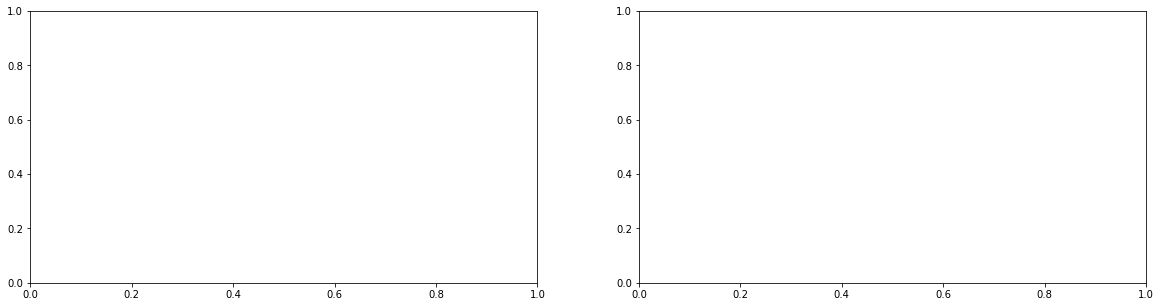

In [18]:
#Affichage des chartes des Score des modéles 
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

In [19]:
#Les stocker dans un dataframe des Accuracies des algorithmes
compare = pd.DataFrame({'Model': ['KNN ', 'RFC', 'SVC', 'Regression Logistique', 'NB'] ,
                        'Accuracy': [KNN_Acc*100, RFC_Acc*100, SVC_Acc*100, REG_Acc*100, NB_Acc*100]})


compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,RFC,100.0
3,Regression Logistique,95.0
4,NB,90.0
0,KNN,65.0
2,SVC,55.0


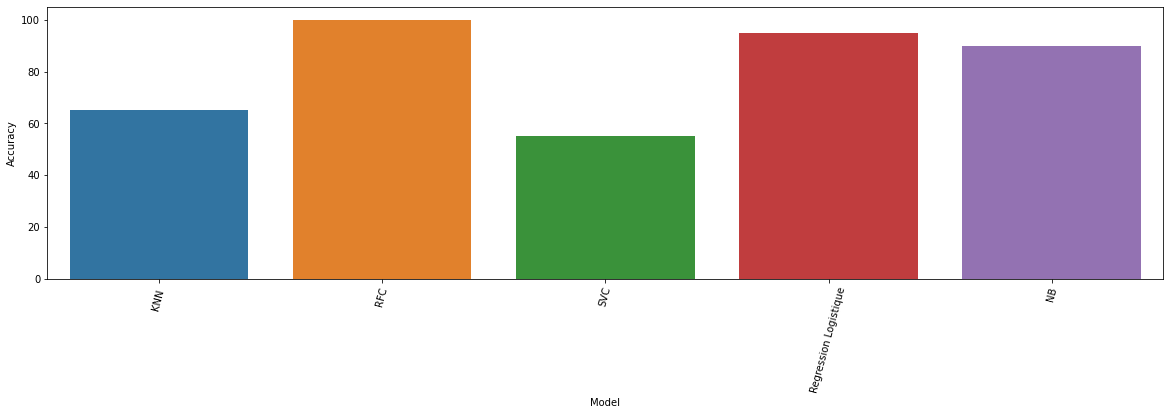

In [20]:
#Affichage des chartes des Score des modéles 
import matplotlib.pyplot as plt
import seaborn as sns



fig,ax = plt.subplots(1,figsize=(20,5))
sns.barplot(x = compare.Model,y = compare.Accuracy)
ax.set_xticklabels(compare.Model,rotation = 75)
plt.show()